**Комментарий ревьюера**

Михаил, привет! Меня зовут Сергей Волков, я буду проверять твой проект по предобработке. Если не против, давай общаться на «ты». Если это неудобно, дай знать, перейдем на «вы».

У тебя уже проделана очень большая работа над проектом, но давай сделаем его еще лучше. Дальше ты найдешь мои комментарии — пожалуйста, не перемещай и не удаляй их. Буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>  ❌красный текст - так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⚠️оранжевый текст - есть рекомендации, на что стоит обратить внимание. Так выделены небольшие замечания. Одно-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> ✔️зеленый текст - все отлично.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

<div class="alert alert-success">
<b>Комментарий ревьюера v.2:</b> ✔️Михаил, привет. Повторные комментарии отмечены v.2</div>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> ✔️Есть название проекта, а ткже цельи ход действия,отлично.</div>

In [9]:
import os

import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

import seaborn as sns
sns.set_context('notebook', font_scale=1.5)
sns.set_style('darkgrid', rc={'ytick.left':True, 'ytick.direction':'in',
                              'xtick.bottom':True, 'xtick.direction':'in'})

import phik

In [10]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

<div class="alert alert-success">
    
<b>Комментарий ревьюера:</b> ✔️Можно было собрать всё в одну ячейку, я так кратко пробежался, там в конце ещё RomdoamSearch отсался).https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html </div>


In [11]:
def get_data(filename):
    
    """
    Reads the data from the given path.
    """

    pth1 = f'/datasets/{filename}'
    pth2 = f'data/{filename}'

    if os.path.exists(pth1):
        df = pd.read_csv(pth1)
        print(f'Reading {pth1}...')
    elif os.path.exists(pth2):
        df = pd.read_csv(pth2)
        print(f'Reading {pth2}...')
    else:
        print('Check the file path')

    return df

## Подготовка данных

`DateCrawled` — дата скачивания анкеты из базы

`VehicleType` — тип автомобильного кузова

`RegistrationYear` — год регистрации автомобиля

`Gearbox` — тип коробки передач

`Power` — мощность (л. с.)

`Model` — модель автомобиля

`Kilometer` — пробег (км)

`RegistrationMonth` — месяц регистрации автомобиля

`FuelType` — тип топлива

`Brand` — марка автомобиля

`NotRepaired` — была машина в ремонте или нет

`DateCreated` — дата создания анкеты

`NumberOfPictures` — количество фотографий автомобиля

`PostalCode` — почтовый индекс владельца анкеты (пользователя)

`LastSeen` — дата последней активности пользователя


In [12]:
file_name = 'autos.csv'
df = get_data(file_name)

df.head()

Reading data/autos.csv...


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


<div class="alert alert-success">
    
<b>Комментарий ревьюера:</b> ✔️Данные загружены, двишаемся давльше. </div>


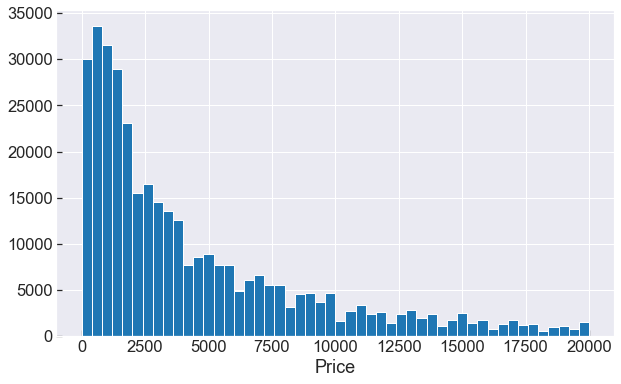

In [13]:
df['Price'].hist(bins=50)

plt.xlabel('Price')

plt.show()

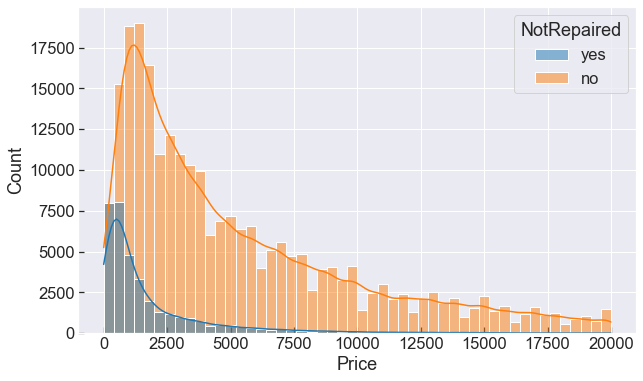

In [14]:
sns.histplot(data=df, x='Price', hue='NotRepaired', bins=50, kde=True)

plt.show()

> Довольно много нереалисично малых значений, заменю их на медианное (посчитанное после исключения малых)

In [15]:
# # Машины дешевле этого порога ниже себестоимости материалов, из которых они сделаны
# realistic_price_threshold = 300

# realistic_price_median = df['Price'][df['Price'] > realistic_price_threshold].median()

# df['Price'] = (df['Price']
#                 .where(df['Price'] > realistic_price_threshold, realistic_price_median)
#                 .astype('int'))

<div class="alert alert-success">
    
<b>Комментарий ревьюера:</b> ✔️Справедливое замечание.</div>


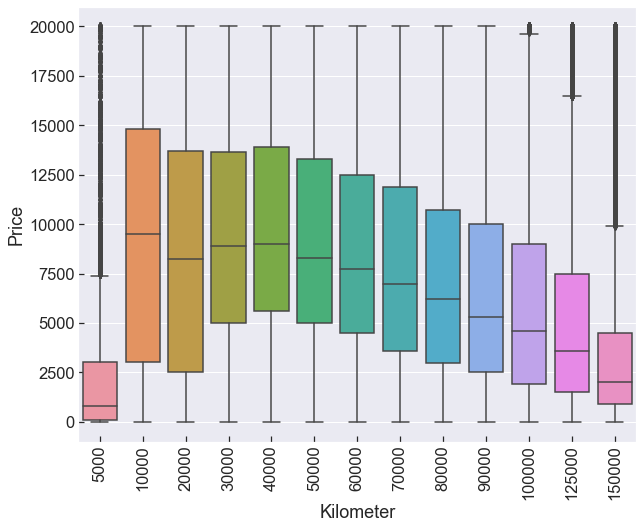

In [16]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(data=df, x='Kilometer', y='Price', ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

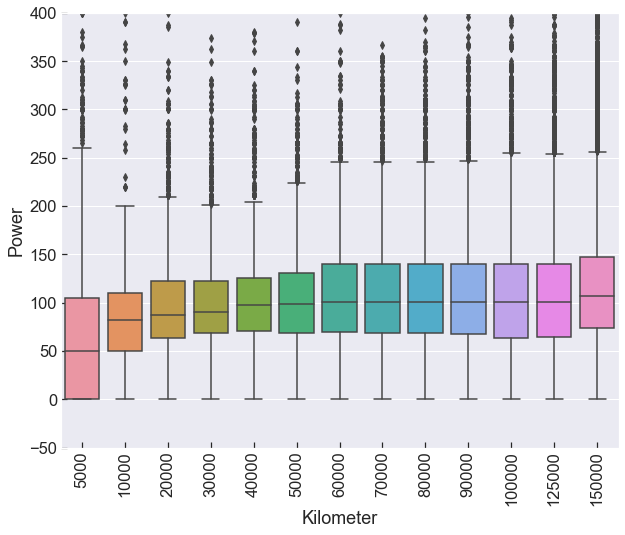

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(data=df, x='Kilometer', y='Power', ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# ax.set_yscale('log')
ax.set_ylim(-50, 400)

plt.show()

In [18]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

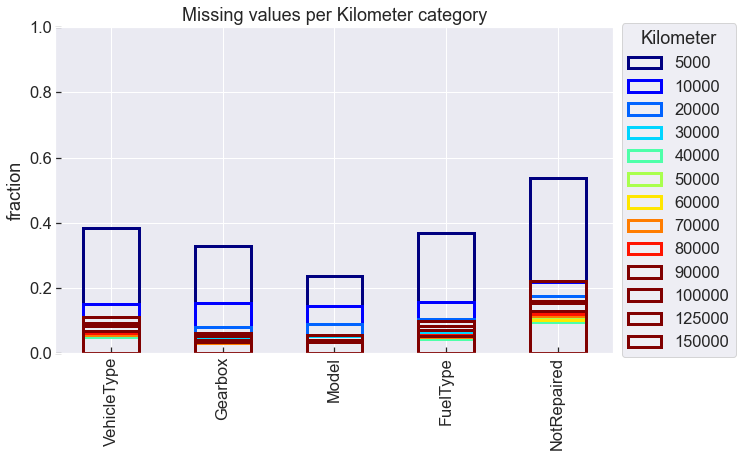

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))

km_list = np.sort(df['Kilometer'].unique())

cmap = get_cmap(10, name='jet')
i = 0 # color iterator

for km in km_list:

    km_df = df[df['Kilometer']==km]

    isna_stat_km = km_df.isna().sum() / km_df.shape[0]

    isna_stat_km[isna_stat_km!=0].plot(kind='bar',
                                       color='None',
                                       lw=3,
                                       ax=ax,
                                       edgecolor=cmap(i),
                                       label=f'{km}')
    ax.set_title(f'{km} km')
    ax.set_ylim(0, 1)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),
              title='Kilometer')
    i+=1

ax.set_title('Missing values per Kilometer category')
ax.set_ylabel('fraction')
plt.show()

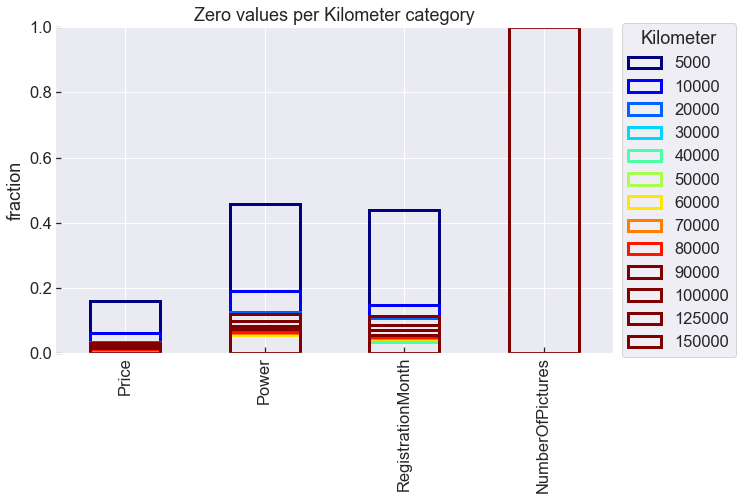

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))

km_list = np.sort(df['Kilometer'].unique())

cmap = get_cmap(10, name='jet')
i = 0 # color iterator

median_prices = []

for km in km_list:

    km_df = df[df['Kilometer']==km]

    iszero_stat_km = (km_df == 0).sum() / km_df.shape[0]

    iszero_stat_km[iszero_stat_km!=0].plot(kind='bar',
                                           color='None',
                                           lw=3,
                                           ax=ax,
                                           edgecolor=cmap(i),
                                           label=f'{km}')
    ax.set_title(f'{km} km')
    ax.set_ylim(0, 1)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),
              title='Kilometer')
    i+=1

ax.set_title('Zero values per Kilometer category')
ax.set_ylabel('fraction')

plt.show()

<div class="alert alert-block alert-warning">
<b> Комментарий студента</b>
    
Существенная доля данных для машин с пробегом 5000 км пропущена (в колонках VehicleType, Gearbox, Model, FuelType, NotRepaired) или равна нулю (в колонках Price, Power, RegistrationMonth, NumberOfPictures). Распределение цены для этих машин выпадает из общего тренда (меньше пробег - дороже машина). Возможно, по этой причине модель ведет себя неадекватно на сторонних тестовых данных. Попробую машины с пробегом 5000 исключить из датасета, т. к. даже если заполнить пропуски исходя из разумных предположений в этой категории окажется много ошибок. А пропуски и выбросы в оставшихся данных заменить по следующим правилам:

`Price` $-$ на медианное значение по всему датасету

`Power` $-$ минимум 50, максимум 250 л.с.

</div>

In [21]:
df = get_data(file_name)

def data_preproces_1(df):
    
    df = df[df['Kilometer']!=5000]

    df['Price'] = df['Price'].where(df['Price'] > 300, 50)
    
    df['Power'] = df['Power'].where(df['Power'] > 50, 50)
    df['Power'] = df['Power'].where(df['Power'] < 500, 500)

    # 'gasoline' и 'petrol' обозначают одно и то же -- бензин
    df['FuelType'] = df['FuelType'].replace('gasoline', 'petrol')

    return df

df = data_preproces_1(df)

Reading data/autos.csv...


/var/folders/nc/53ydtkz56jj83586jxv6mvlm0000gn/T/ipykernel_11891/3847019665.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].where(df['Price'] > 300, 50)
/var/folders/nc/53ydtkz56jj83586jxv6mvlm0000gn/T/ipykernel_11891/3847019665.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Power'] = df['Power'].where(df['Power'] > 50, 50)
/var/folders/nc/53ydtkz56jj83586jxv6mvlm0000gn/T/ipykernel_11891/3847019665.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy o

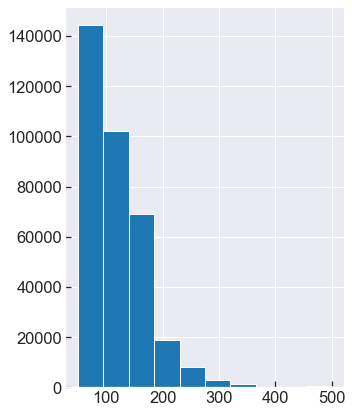

In [22]:
plt.figure(figsize=(5, 7))

df['Power'].hist()
# df['Power'].plot(kind='box')

plt.show()

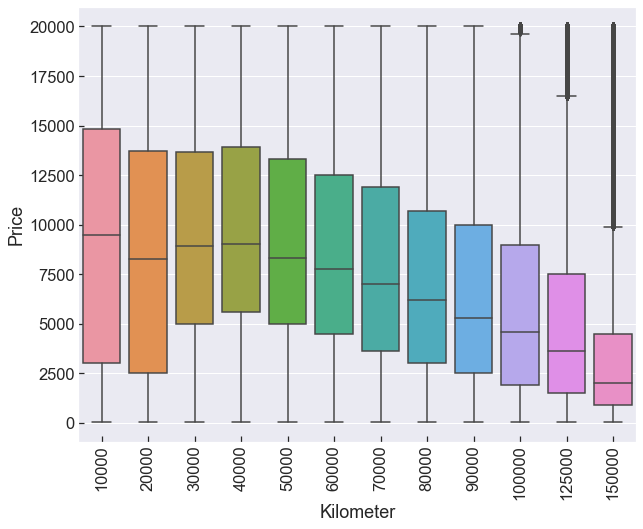

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(data=df, x='Kilometer', y='Price', ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

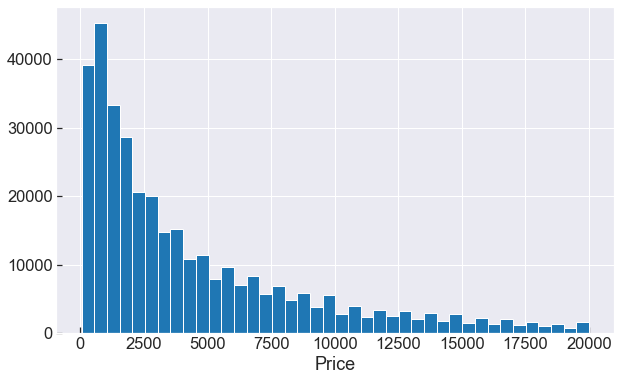

In [24]:
df['Price'].hist(bins=40)

plt.xlabel('Price')

plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347972 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        347972 non-null  object
 1   Price              347972 non-null  int64 
 2   VehicleType        312930 non-null  object
 3   RegistrationYear   347972 non-null  int64 
 4   Gearbox            330243 non-null  object
 5   Power              347972 non-null  int64 
 6   Model              329777 non-null  object
 7   Kilometer          347972 non-null  int64 
 8   RegistrationMonth  347972 non-null  int64 
 9   FuelType           317445 non-null  object
 10  Brand              347972 non-null  object
 11  NotRepaired        280249 non-null  object
 12  DateCreated        347972 non-null  object
 13  NumberOfPictures   347972 non-null  int64 
 14  PostalCode         347972 non-null  int64 
 15  LastSeen           347972 non-null  object
dtypes: int64(7), object(

### Предобработка и заполнение пропусков

In [26]:
df.columns

Index(['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand',
       'NotRepaired', 'DateCreated', 'NumberOfPictures', 'PostalCode',
       'LastSeen'],
      dtype='object')

In [27]:
crowl_date = pd.to_datetime(df['DateCrawled'])

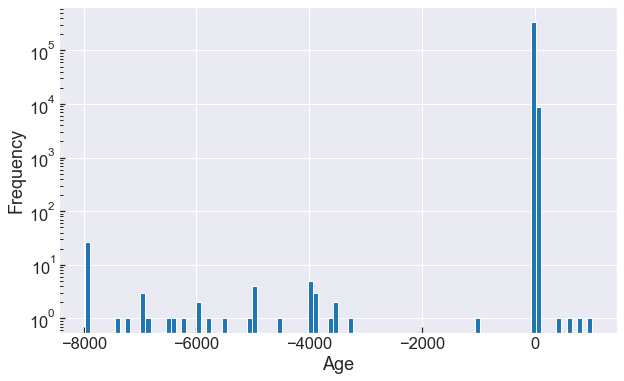

In [28]:
df['Age'] = crowl_date.dt.year - df['RegistrationYear']

df['Age'].plot(kind='hist', bins=100)

plt.xlabel('Age')

plt.yscale('log')
plt.show()

Адекватная часть распределения должна прилегать к нулю справа:

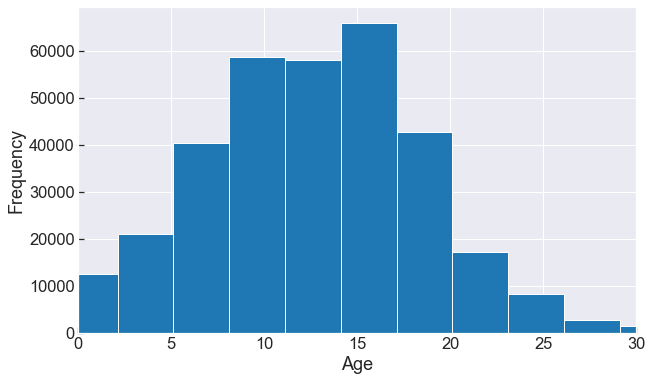

In [29]:
df['Age'] = crowl_date.dt.year - df['RegistrationYear']

df['Age'].plot(kind='hist', bins=3000)

plt.xlim(0, 30)

plt.xlabel('Age')

plt.show()

In [30]:
def data_preproces_2(df):
    
    df['Age'] = df['Age'].where(df['Age'] > 1, df['Age'].median())
    df['Age'] = df['Age'].where(df['Age'] < 30, df['Age'].median())

    return df

df = data_preproces_2(df)

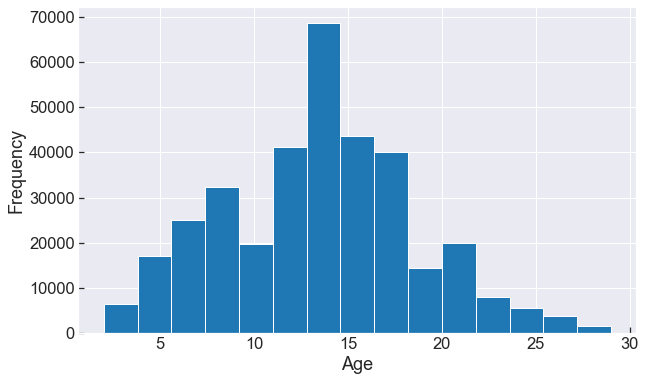

In [31]:
df['Age'].plot(kind='hist', bins=15)

plt.xlabel('Age')

plt.show()

<div class="alert alert-warning">
    
<b>Комментарий ревьюера:</b> Не совсем понимаю,как стоимость машины зависит от даты создания объявления, чтоб этопроверить, можно вывести матрицу корреляции, плюс у нас год регистрации и месяц регистрации, как мне кажется какие-то из этих признаков лишнии, т.е нам необходимо в зависимоти от возраста тс, её еще ряда признаков, пробега, марки, типа топлива и как вариант типа кпп определить стоимость, вот мы можем пойти по двум путям, или мы считает возраст в месецах или годах, а так получаются " сбивающие" друг-друга признаки. Если совневаемся, можно проверить после обучения, выведя график важности фичей, он есть у LGBM.  </div>


In [32]:
# # Случайный автомобиль с вероятностью 75% будет с ручной коробкой передач
# df['Gearbox'] = df['Gearbox'].fillna('manual')
# # Случайный автомобиль с вероятностью 98% будет работать на бензине
# df['FuelType'] = df['FuelType'].fillna('petrol')
# # Случайный автомобиль с вероятностью 70% побывал в ремонте
# df['NotRepaired'] = df['NotRepaired'].fillna('no')

<div class="alert alert-block alert-warning">
<b> Комментарий студента (#2)</b>
    
Перенесу заполнение пропусков в раздел с "простыми" моделями, поскольку LGBM умеет обрабатывать пропуски из коробки.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v.2:</b> ✔️Ну лучше попробовать два способа, т.е. две Lgbm модели, с пропусками и обработанными пропусками.</div>

<div class="alert alert-block alert-warning">
<b> Комментарий студента (#3)</b>
    
Попробовал LGBM на данных с обработанными пропусками, результат очень похожий.

</div>

<div class="alert alert-warning">
    
<b>Комментарий ревьюера:</b> Мы прогназируем стоимость, что для нас важно, это максимальная точность в данных, например по такой логике может получится, что электрокар или гибрид у нас с МКПП, а такого не бывает. Можно поступить следующим образом, заполнить модой, заполнить неизвестной или удалить, т.к. размер датасета позваляет, not_reperead заполнить или как у тебя no или по категории пробега, до пробега не ремонтировалась, после ремонтировалась. Мода, неизвестная или удалить можно даже проверить опытным путем и потом остановиться на лучшем показателе метрики. </div>


<div class="alert alert-block alert-warning">
<b> Комментарий студента (#2)</b>
    
Исправил предобработку в соответствии с твоими замечаниями.

</div>

In [33]:
df.columns

Index(['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand',
       'NotRepaired', 'DateCreated', 'NumberOfPictures', 'PostalCode',
       'LastSeen', 'Age'],
      dtype='object')

In [34]:
def data_preproces_3(df):

    df = df.drop(columns=['DateCreated', 'DateCrawled', 'LastSeen',
                          'PostalCode', 'NumberOfPictures', 'RegistrationYear',
                          'RegistrationMonth'])
    return df

df = data_preproces_3(df)

<!-- `VehicleType` придется заменить, а вот `Model` просто уберу из признаков: слишком много различных значений для формулирования адекватного способа заполнения пропусков. -->

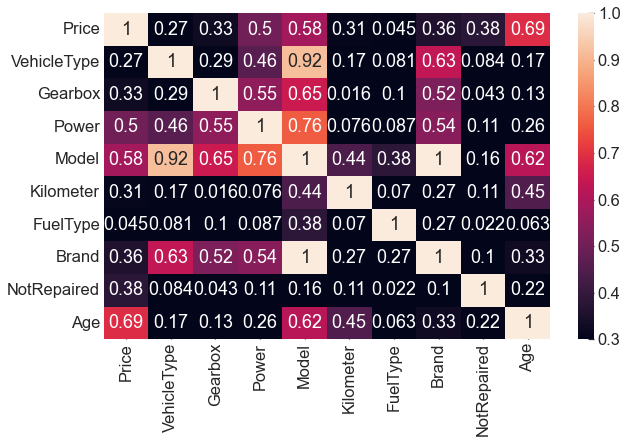

In [35]:
phik_overview = df.phik_matrix(interval_cols=['Price', 'Power', 'Kilometer', 'Age'])

sns.heatmap(phik_overview, annot=True, vmin=.3)

plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера v.2:</b> ✔️Не обязательно было её сюда добовлять, просто хотел поделиться, но так корряляция лучше прослежживается🔥</div>

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347972 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Price        347972 non-null  int64  
 1   VehicleType  312930 non-null  object 
 2   Gearbox      330243 non-null  object 
 3   Power        347972 non-null  int64  
 4   Model        329777 non-null  object 
 5   Kilometer    347972 non-null  int64  
 6   FuelType     317445 non-null  object 
 7   Brand        347972 non-null  object 
 8   NotRepaired  280249 non-null  object 
 9   Age          347972 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 29.2+ MB


#### Заполнение пропусков

In [37]:
# Копия датасета для линейной регрессии
df_ohe = df.copy()

df_ohe['Gearbox'] = df_ohe['Gearbox'].fillna('unknown')
df_ohe['FuelType'] = df_ohe['FuelType'].fillna('unknown')
# Случайный автомобиль с вероятностью 70% побывал в ремонте
df_ohe['NotRepaired'] = df_ohe['NotRepaired'].fillna('no')

In [38]:
# Изменю тип данных 'object' на 'category' для совместимости с lightGBM
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347972 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   Price        347972 non-null  int64   
 1   VehicleType  312930 non-null  category
 2   Gearbox      330243 non-null  category
 3   Power        347972 non-null  int64   
 4   Model        329777 non-null  category
 5   Kilometer    347972 non-null  int64   
 6   FuelType     317445 non-null  category
 7   Brand        347972 non-null  category
 8   NotRepaired  280249 non-null  category
 9   Age          347972 non-null  float64 
dtypes: category(6), float64(1), int64(3)
memory usage: 15.6 MB


In [39]:
#код ревьюера
df.describe()

,Price,Power,Kilometer,Age
count,347972.000000,347972.000000,347972.000000,347972.000000
mean,4443.337731,113.244827,130476.245215,13.345959
std,4515.719351,56.327676,34336.791956,5.120805
min,50.000000,50.000000,10000.000000,2.000000
25%,1100.000000,69.000000,125000.000000,10.000000
50%,2790.000000,105.000000,150000.000000,13.000000
75%,6490.000000,143.000000,150000.000000,17.000000
max,20000.000000,500.000000,150000.000000,29.000000


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>  ❌Много аномалий осталось, мощность не может быть нулевой, наверно её стоит ограничить самой маломощной машиной выборки, также не может быть 20 000 л.с. Раз мы оставили год, месяц, они тоже содержат ыномалии, но я бы советовал или оставить год регистрации, избавившись от выбросом и артефактов сначали или вывести возраст машины в месяцах. 

Вывода не хватает, вэтом проекте предобработка и анализ очень важны.</div>


<div class="alert alert-success">
<b>Комментарий ревьюера v.2:</b> ✔️Верхнюю планку сильно порезал, есть Порше, есть БМВ, Вольво таже, думаю до 600 л.с. v.2</div>

<div class="alert alert-block alert-warning">
<b> Комментарий студента #3</b>
    
Поднял верхний порог до 500 л. с.

</div>

## Обучение моделей

### LightGBM

In [40]:
X = df.drop(columns=['Price'])
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
catetory_columns = list(X.select_dtypes(include=['category']).columns)

catetory_columns

['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']

In [42]:
lgbm_model = LGBMRegressor(random_state=42, metric='rmse')

In [43]:
%%time
lgbm_model.fit(X_train, y_train, categorical_feature=catetory_columns)

/Users/mike/opt/anaconda3/envs/practicum_new/lib/python3.10/site-packages/lightgbm/basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


CPU times: user 4.52 s, sys: 740 ms, total: 5.26 s
Wall time: 916 ms


LGBMRegressor(metric='rmse', random_state=42)

In [44]:
lgbm_predictions = lgbm_model.predict(X_test)

lgbm_rmse = mse(y_test, lgbm_predictions) ** 0.5

print(f'LightGBM RMSE: {lgbm_rmse:.0f}')

LightGBM RMSE: 1778


In [45]:
param_grid = {
    'num_leaves': np.arange(500, 1200, 50),
    'min_data_in_leaf': [30, 40, 50, 80]
    }

In [46]:
random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm_model,
    param_distributions=param_grid,
    n_iter=5,
    cv=3,
    scoring='neg_root_mean_squared_error',
    verbose=50,
    random_state=42
)

In [39]:
%%time
random_search_lgbm.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3; 1/5] START min_data_in_leaf=30, num_leaves=500.........................
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[CV 1/3; 1/5] END min_data_in_leaf=30, num_leaves=500;, score=-1703.653 total time=   3.9s
[CV 2/3; 1/5] START min_data_in_leaf=30, num_leaves=500.........................
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[CV 2/3; 1/5] END min_data_in_leaf=30, num_leaves=500;, score=-1712.633 total time=   3.0s
[CV 3/3; 1/5] START min_data_in_leaf=30, num_leaves=500.........................
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[CV 3/3; 1/5] END min_data_in_leaf=30, num_leaves=500;, score=-1712.460 total time=   2.6s
[CV 1/3; 2/5] START min_data_in_leaf=30, num_leaves=750...

RandomizedSearchCV(cv=3,
                   estimator=LGBMRegressor(metric='rmse', random_state=42),
                   n_iter=5,
                   param_distributions={'min_data_in_leaf': [30, 40, 50, 80],
                                        'num_leaves': array([ 500,  550,  600,  650,  700,  750,  800,  850,  900,  950, 1000,
       1050, 1100, 1150])},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=50)

In [40]:
-random_search_lgbm.best_score_

1706.8364349840379

In [41]:
random_search_lgbm.best_params_

{'num_leaves': 750, 'min_data_in_leaf': 30}

In [47]:
best_lgbm_hardcode = {'num_leaves': 750, 'min_data_in_leaf': 30}

In [50]:
lgbm_hardcoded = LGBMRegressor(random_state=42, metric='rmse', **best_lgbm_hardcode)

In [54]:
lgbm_hardcoded.fit(X_train, y_train, categorical_feature=catetory_columns)

/Users/mike/opt/anaconda3/envs/practicum_new/lib/python3.10/site-packages/lightgbm/basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30


array([ 4078,  3937, 24072,  7828, 11144,   436,  4272,  4319, 14814],
      dtype=int32)

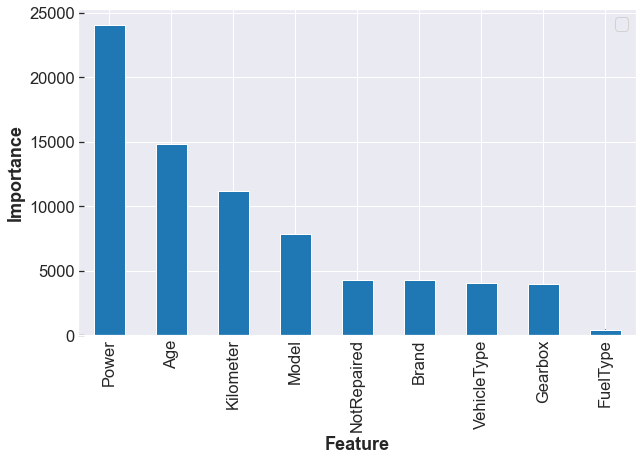

In [112]:
fig, ax = plt.subplots(figsize=(10, 6))

features_importance = pd.DataFrame({'features': X_train.columns,
                                    'importance': lgbm_hardcoded.feature_importances_})

features_importance.set_index('features', inplace=True)

features_importance = features_importance.sort_values('importance', ascending=False)
features_importance.plot(kind='bar', ax=ax)

plt.xticks(rotation=90)

plt.ylabel('Importance', weight='bold')
plt.xlabel('Feature', weight='bold')
plt.legend('')

plt.show()

In [43]:
random_lgbm_predictions = random_search_lgbm.predict(X_test)

lgbm_rmse = mse(y_test, random_lgbm_predictions) ** 0.5

print(f'LightGBM RMSE: {lgbm_rmse:.2f}')

LightGBM RMSE: 1661.18


### Тесты на сторонних данных

In [ ]:
df[df['Brand']=='honda']['Model'].unique()

In [ ]:
df[df['Brand']=='volvo']['Model'].unique()

In [ ]:
df[df['Brand']=='volvo'].sort_values('Price', ascending=False)[['Model', 'Price']]

In [102]:
honda_test_df = pd.Series(
          {'VehicleType': 'small',
          'Gearbox': 'manual',
          'Power': 83,
          'Model': 'jazz',
          'Kilometer': 95000,
          'FuelType': 'petrol',
          'Brand': 'honda',
          'NotRepaired': 'no',
          'Age': 10})

honda_test_df = pd.DataFrame(honda_test_df).T

honda_test_df

,VehicleType,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired,Age
0,small,manual,83,jazz,95000,petrol,honda,no,10


In [103]:
honda_test_less_km_df = pd.Series(
          {'VehicleType': 'small',
          'Gearbox': 'manual',
          'Power': 83,
          'Model': 'jazz',
          'Kilometer': 10000,
          'FuelType': 'petrol',
          'Brand': 'honda',
          'NotRepaired': 'no',
          'Age': 2})

honda_test_less_km_df = pd.DataFrame(honda_test_less_km_df).T

honda_test_less_km_df

,VehicleType,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired,Age
0,small,manual,83,jazz,10000,petrol,honda,no,2


In [104]:
volvo_test_df = pd.Series(
          {'VehicleType': 'crossover',
          'Gearbox': 'auto',
          'Power': 190,
          'Model': 'v60',
          'Kilometer': 135000,
          'FuelType': 'petrol',
          'Brand': 'volvo',
          'NotRepaired': 'no',
          'Age': 5})

volvo_test_df = pd.DataFrame(volvo_test_df).T

volvo_test_df

,VehicleType,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired,Age
0,crossover,auto,190,v60,135000,petrol,volvo,no,5


In [105]:
volvo_test_less_km_df = pd.Series(
          {'VehicleType': 'crossover',
          'Gearbox': 'auto',
          'Power': 190,
          'Model': 'v60',
          'Kilometer': 35000,
          'FuelType': 'petrol',
          'Brand': 'volvo',
          'NotRepaired': 'no',
          'Age': 1})

volvo_test_less_km_df = pd.DataFrame(volvo_test_less_km_df).T

volvo_test_less_km_df

,VehicleType,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired,Age
0,crossover,auto,190,v60,35000,petrol,volvo,no,1


In [106]:
test_cars = [honda_test_df,
             honda_test_less_km_df,
             volvo_test_df,
             volvo_test_less_km_df]

pd.concat(test_cars).reset_index(drop=True).to_csv('data/test_cars.csv', index=False)

In [107]:
def prepare_test(test_data_df):

    for column in catetory_columns:
        test_data_df[column] = test_data_df[column].astype('category')

    # Изменю тип данных 'object' на 'category' для совместимости с lightGBM
    for column in test_data_df.select_dtypes(include=['object']).columns:
        test_data_df[column] = test_data_df[column].astype('int64')

    return test_data_df

In [108]:
volvo_test_df = prepare_test(volvo_test_df)
volvo_test_less_km_df = prepare_test(volvo_test_less_km_df)
honda_test_df = prepare_test(honda_test_df)
honda_test_less_km_df = prepare_test(honda_test_less_km_df)

__При уменьшении пробега цена падает:__

🤔

In [111]:
print(f'Volvo, пробег 35000 км, возраст 1 год: {lgbm_hardcoded.predict(volvo_test_less_km_df)[0] * 77:.0f} рублей')
print(f'Volvo, пробег 135000 км, возраст 5 лет: {lgbm_hardcoded.predict(volvo_test_df)[0] * 77:.0f} рублей')

Volvo, пробег 35000 км, возраст 1 год: 899499 рублей
Volvo, пробег 135000 км, возраст 5 лет: 1241730 рублей


<div class="alert alert-block alert-warning">
<b> Комментарий студента</b>
    
Это может быть показателем того, что модель обучена неверно?

Или, например, проблемы с данными?

</div>

На этом примере после дополнительной очистки данных заработала адекватнее:

In [110]:
print(f'Honda, пробег 10000 км, возраст 2 года: {lgbm_hardcoded.predict(honda_test_less_km_df)[0] * 55:.0f} рублей')
print(f'Honda, пробег 95000 км, возраст 10 лет: {lgbm_hardcoded.predict(honda_test_df)[0] * 55:.0f} рублей')

Honda, пробег 10000 км, возраст 2 года: 528728 рублей
Honda, пробег 95000 км, возраст 10 лет: 245218 рублей


<div class="alert alert-success">
<b>Комментарий ревьюера:</b> ✔️Крутая идея, проверить модель в бою так сказать🔥. У нас остались аномалии и лишнии признаки и артефакты, они влияют на её "адекватность":)</div>

### LightGBM на данных с заполненными пропусками

In [ ]:
# Encoding
df_ohe = df_ohe.drop(columns=['Brand'])
df_ohe = pd.get_dummies(df_ohe)

X_ohe = df_ohe.drop(columns=['Price'])
y_ohe = df_ohe['Price']

X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(X_ohe, y_ohe, test_size=0.2, random_state=42)

In [ ]:
numerical_columns = list(X_train_ohe.select_dtypes(include=['int64', 'float64']).columns)

numerical_columns

In [ ]:
# Scaling
scaler = StandardScaler()
scaler.fit(X_train_ohe[numerical_columns])

X_train_ohe[numerical_columns] = scaler.transform(X_train_ohe[numerical_columns])
X_test_ohe[numerical_columns] = scaler.transform(X_test_ohe[numerical_columns])

In [ ]:
# %%time
lgbm_model_ohe = LGBMRegressor(random_state=42, metric='rmse')

lgbm_model_ohe.fit(X_train_ohe, y_train_ohe)

param_grid = {
    'num_leaves': np.arange(500, 1200, 50),
    'min_data_in_leaf': [30, 40, 50, 80]
    }

random_search_lgbm_ohe = RandomizedSearchCV(
    estimator=lgbm_model_ohe,
    param_distributions=param_grid,
    n_iter=5,
    cv=3,
    scoring='neg_root_mean_squared_error',
    verbose=50,
    random_state=42
)

random_search_lgbm_ohe.fit(X_train_ohe, y_train_ohe)

print(f'RMSE: {-random_search_lgbm_ohe.best_score_:.0f}')

### Linear regression

In [ ]:
linear_model = LinearRegression()

In [ ]:
%time
linear_model.fit(X_train_ohe, y_train)

In [ ]:
linear_predictions = linear_model.predict(X_test_ohe)
linear_rmse = mse(y_test, linear_predictions) ** 0.5

print(f'Linear RMSE: {linear_rmse:.0f}')

## Анализ моделей

Простая линейная модель обучается очень быстро (микросекунды), но в ее предсказаниях присутствуют большие ошибки (метрика RMSE составляет 3687. Подбор гиперпараметров и обучение модели градиентного бустинга LightGBM занимает гораздо больше времени (около 3 минут), но при этом ошибка RMSE сокращается более чем на 50% (до 1644).

In [ ]:
model_stat = {'Model': ['LGBM', 'LinearRegression'],
              'Time (sec)': [90, 5e-6],
              'RMSE': [f'{lgbm_rmse:.0f}', f'{linear_rmse:.0f}']}

pd.DataFrame(model_stat)

<div class="alert alert-success">
<b>Итоговый комментарий ревьюера </b> Михаил, была проделана хорошая  работа, спасибо тебе. Но необходимо ещё чуть - чуть потрудиться:
    
    
   - Хорошо структурированная работа, приятно проверять.
   - Понятный код.
   - Очень хорошая идея с проверкой модели на реальных данных.
   - Посмотреть ещё раз на аномалии и выбросы, они влияют на качество модели.
   - Остались не нужные признаки.
   - Лучше добавить таблицу с корреляцией признаков. Если инетересно можешь почитьать про phik корреляцию, может пригодится в будущем, здесь не обязательно использовать. Это корреляция, которая показывает не линейные зависимости в том числе и в категориальных признаках https://phik.readthedocs.io/en/latest/.  
   - В конце данные лучше свести в одну таблицу, так наглядней.
   - Можешь добавить ещё одну модель, что-то среднее, "лес" например). 
  
Жду твоих исправлений, их не так много, и я верю, что ты справишься. Также буду рад ответить на тови вопросы. И огромная просьба не удаляй мой комментарии.
    
    Тетрадь был вынужден запускать локально, рандом серч убивал ядро в хабе.


<div class="alert alert-block alert-warning">
<b> Комментарий студента #2</b>
    
Уделил больше внимания предобработке данных. На тестовых объектах для Honda модель начала вести себя более адекватно, для Volvo подозрительное поведение осталась.

</div>

<div class="alert alert-success">
<b>Итоговый комментарий ревьюера v.2:</b> ✔️Это получается потому что, модель не знает такую модель volvo как xc60, не знает тип топлива дизель и мощность мы порезали до 250, я локально чуть поправил, мощность ограничил до 600, а в модели добавил модель Вольво, которая есть в датасете, вроде заработало, плюс пропуски не обработанные сказываются как мне кажется.

В целом проект может быть принят, отправлю тебе обратно, чтоб была возможность задать вопросы и при желании чуть поправить данные).Обработку пропусков нужно все-таки перенести в раздел предобработки. </div>

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей